In [1]:
import pandas as pd
df=pd.read_csv("newdataset.csv")
df

,Unnamed: 0,BMDSTATS,RIAGENDR,RIDAGEYR,BMXWT,BHXHT,BMXLEG,BOXARML,BMXARMC,BMXWAIST,BMXHIP,OUTMAL
0,0,1,2,13,0.165946,0.775050,0.660000,0.677355,0.351938,0.340267,0.453333,1
1,1,1,1,2,0.047188,0.447395,0.704377,0.372745,0.229457,0.219733,0.563755,1
2,2,1,2,29,0.381832,0.802605,0.741818,0.695391,0.555039,0.628800,0.672533,0
3,3,1,2,18,0.296107,0.781563,0.774545,0.723447,0.480620,0.487467,0.563755,0
4,4,1,1,2,0.388517,0.913327,0.729091,0.841683,0.592248,0.642133,0.577067,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13132,13132,1,1,11,0.427841,0.845190,0.829091,0.773547,0.520930,0.611733,0.629333,0
13133,13133,1,2,12,0.060558,0.469439,0.704377,0.350701,0.244961,0.258133,0.563755,1
13134,13134,1,1,64,0.090051,0.617735,0.704377,0.486974,0.286822,0.306667,0.563755,1
13135,13135,1,2,12,0.312623,0.883768,0.763636,0.791583,0.486822,0.517867,0.532267,0


In [2]:
df=df.drop(['Unnamed: 0'],axis=1)

In [3]:
import numpy as np

In [4]:
X= df[['BMDSTATS'	,'RIAGENDR',	'RIDAGEYR',	'BMXWT',	'BHXHT',	'BMXLEG',	'BOXARML',	'BMXARMC',	'BMXWAIST',	'BMXHIP']].values
X[0:10]

array([[1.00000000e+00, 2.00000000e+00, 1.30000000e+01, 1.65945733e-01,
        7.75050100e-01, 6.60000000e-01, 6.77354709e-01, 3.51937984e-01,
        3.40266667e-01, 4.53333333e-01],
       [1.00000000e+00, 1.00000000e+00, 2.00000000e+00, 4.71883602e-02,
        4.47394790e-01, 7.04376742e-01, 3.72745491e-01, 2.29457364e-01,
        2.19733333e-01, 5.63755337e-01],
       [1.00000000e+00, 2.00000000e+00, 2.90000000e+01, 3.81832481e-01,
        8.02605210e-01, 7.41818182e-01, 6.95390782e-01, 5.55038760e-01,
        6.28800000e-01, 6.72533333e-01],
       [1.00000000e+00, 2.00000000e+00, 1.80000000e+01, 2.96106960e-01,
        7.81563126e-01, 7.74545455e-01, 7.23446894e-01, 4.80620155e-01,
        4.87466667e-01, 5.63755337e-01],
       [1.00000000e+00, 1.00000000e+00, 2.00000000e+00, 3.88517499e-01,
        9.13326653e-01, 7.29090909e-01, 8.41683367e-01, 5.92248062e-01,
        6.42133333e-01, 5.77066667e-01],
       [1.00000000e+00, 1.00000000e+00, 4.90000000e+01, 2.92174597e-01,
   

In [5]:
y=df['OUTMAL'].values
y[0:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print('Train set :',X_train.shape,y_train.shape)
print('Test set :',X_test.shape,y_test.shape)

Train set : (10509, 10) (10509,)
Test set : (2628, 10) (2628,)


In [7]:

from sklearn.tree import DecisionTreeClassifier

In [8]:
malTree=DecisionTreeClassifier(criterion="entropy",max_depth=None)
malTree

DecisionTreeClassifier(criterion='entropy')

In [9]:
malTree.fit(X_train,y_train)
DecisionTreeClassifier(criterion='entropy')

DecisionTreeClassifier(criterion='entropy')

In [10]:
predTree=malTree.predict(X_test)
print(predTree[0:10])
print(y_test[0:10])

[1 1 0 0 1 0 0 0 0 0]
[1 1 0 0 1 0 0 0 0 0]


In [11]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Decision's tree accuracy",metrics.accuracy_score(y_test,predTree))

Decision's tree accuracy 0.9855403348554034


In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,predTree)

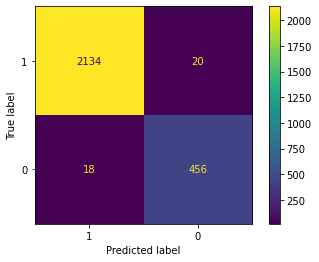

In [13]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,0])
disp.plot()
plt.show()

In [14]:
print(classification_report(y_test,predTree))
print("Decision's tree accuracy",metrics.accuracy_score(y_test,predTree))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2154
           1       0.96      0.96      0.96       474

    accuracy                           0.99      2628
   macro avg       0.97      0.98      0.98      2628
weighted avg       0.99      0.99      0.99      2628

Decision's tree accuracy 0.9855403348554034
